In [85]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost imbalanced-learn

In [87]:
!pip install matplotlib

In [89]:
!pip install plotly

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import pandas as pd

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [26]:
#load data set info
df = pd.read_csv ('creditcard.csv')

In [28]:
#display first 20 rows
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [177]:
#get data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204081 entries, 0 to 204080
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    204081 non-null  float64
 1   V1      204081 non-null  float64
 2   V2      204081 non-null  float64
 3   V3      204081 non-null  float64
 4   V4      204081 non-null  float64
 5   V5      204081 non-null  float64
 6   V6      204081 non-null  float64
 7   V7      204081 non-null  float64
 8   V8      204081 non-null  float64
 9   V9      204081 non-null  float64
 10  V10     204081 non-null  float64
 11  V11     204081 non-null  float64
 12  V12     204080 non-null  float64
 13  V13     204080 non-null  float64
 14  V14     204080 non-null  float64
 15  V15     204080 non-null  float64
 16  V16     204080 non-null  float64
 17  V17     204080 non-null  float64
 18  V18     204080 non-null  float64
 19  V19     204080 non-null  float64
 20  V20     204080 non-null  float64
 21  V21     20

In [11]:
#check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [181]:
#drop rows with missing values 
df = df.dropna()

In [183]:
#verify missing values are removed
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [185]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,...,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000,204080.000000
mean,71913.428406,-0.095802,0.001354,0.295326,0.070012,-0.101553,0.042991,-0.045443,0.014216,0.008530,...,-0.013382,-0.042940,-0.014381,0.003886,0.057186,0.005605,0.001410,0.001783,89.763740,0.001921
std,35414.443890,1.897875,1.626304,1.455326,1.400716,1.363524,1.313408,1.218620,1.208543,1.133309,...,0.737283,0.694143,0.615026,0.603831,0.494689,0.488144,0.395174,0.317946,248.409518,0.043785
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,44754.000000,-0.959274,-0.583613,-0.376587,-0.797727,-0.777220,-0.714340,-0.574242,-0.183908,-0.662070,...,-0.226685,-0.536587,-0.168448,-0.343110,-0.246274,-0.331284,-0.067779,-0.042977,5.990000,0.000000
50%,68031.000000,-0.078663,0.079375,0.473489,0.070888,-0.159868,-0.222110,-0.006234,0.041169,-0.072343,...,-0.041363,-0.030597,-0.027993,0.051800,0.098885,-0.061097,0.005494,0.018033,23.000000,0.000000
75%,97823.250000,1.218283,0.783347,1.209829,0.877681,0.479230,0.441551,0.508486,0.336824,0.623964,...,0.153914,0.433122,0.116754,0.422865,0.382981,0.260482,0.089114,0.078091,79.380000,0.000000
max,135102.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [15]:
#count the number of frauds vs real transactions
df['Class'].value_counts()

Class
0.0    203688
1.0       392
Name: count, dtype: int64

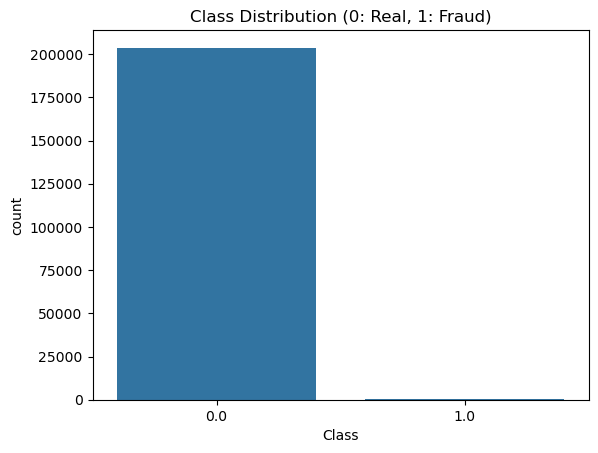

In [189]:
sns.countplot(x = 'Class', data = df)
plt.title('Class Distribution (0: Real, 1: Fraud)')
plt.show()

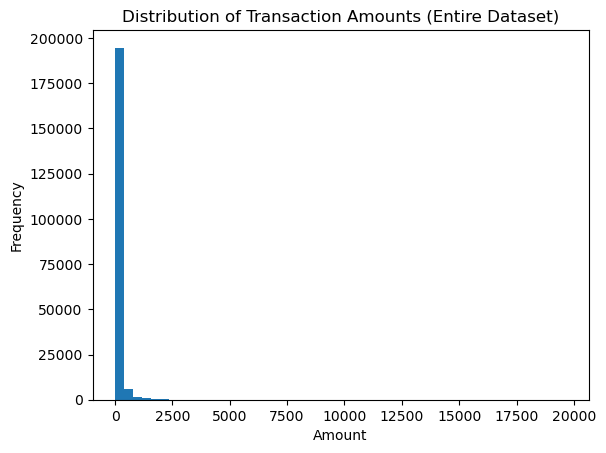

In [191]:
#histogram transaction amount
plt.hist(df['Amount'], bins = 50)
plt.title('Distribution of Transaction Amounts (Entire Dataset)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [193]:
#to not overload the chart, sample 10,000 rows
df_sample = df.sample(n = 10000, random_state = 42)

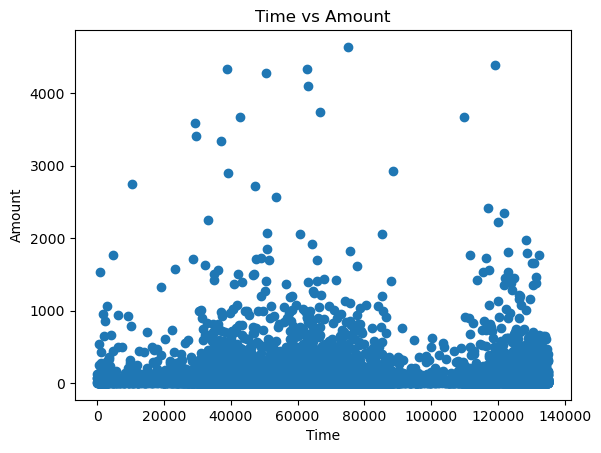

In [195]:
#scatter plot of time vs amount
plt.scatter(df_sample['Time'], df_sample['Amount'])
plt.title('Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

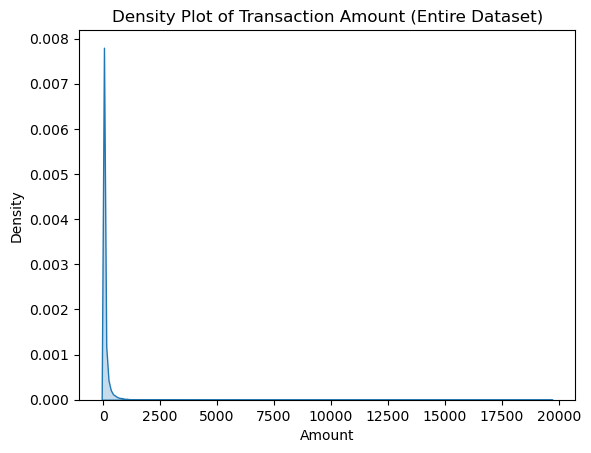

In [131]:
#density plot for the amount column
sns.kdeplot(df['Amount'], fill = True)
plt.title('Density Plot of Transaction Amount (Entire Dataset)')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

In [197]:
#adjust the Amount column to bring all features to a similar scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [199]:
#convert to dataframe
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [201]:
#split dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [203]:
#use SMOTE technique to fix imbalanced datasets
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [205]:
#create logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

#increase max iter to 1000
model = LogisticRegression(max_iter = 1000)
model.fit(X_resampled, y_resampled)

#make predictions on the test set
y_pred = model.predict(X_test)

#evaluate the model
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     40745
         1.0       0.06      0.90      0.11        71

    accuracy                           0.97     40816
   macro avg       0.53      0.94      0.55     40816
weighted avg       1.00      0.97      0.99     40816

ROC-AUC Score: 0.9381505377830859


In [215]:
#export as a csv file
df.to_csv('cleaned_data_creditcard.csv', index = False)

In [33]:
df['BLOCK'] = (df['V12'] < -60) & (df['V14'] < -40)

In [35]:
df[df['BLOCK']].to_csv('HIGH_RISK_TRANSACTIONS.csv', index=False)

In [37]:
df.to_csv('cleaned_data_creditcard.csv', index=False)